In [13]:
import pandas as pd
import os
from typing import Literal
import matplotlib.pyplot as plt
import seaborn as sns
import random

dir = "C:/Users/Will/Desktop/results/"

a =  pd.read_csv(dir +'results_bct.csv')
b = pd.read_csv(dir + 'results_bct_2.csv')
c = pd.concat([a, b])


gnm = pd.concat([pd.read_csv('results_gnm_num.csv'), pd.read_csv('results_gnm_num_2.csv')])
print(c)
bct = pd.read_csv('results_bct_num.csv')
gnm = gnm.loc[gnm['time_gnm'] < 4]

    connectome_size  density    time_bct
0                10      0.1    0.120963
1                20      0.1    0.492951
2                30      0.1    1.155029
3                40      0.1    2.140553
4                50      0.1    3.290435
..              ...      ...         ...
40              250      0.9   93.312137
41              260      0.9  105.097326
42              270      0.9  114.333395
43              280      0.9  123.503156
44              290      0.9  134.317883

[92 rows x 3 columns]


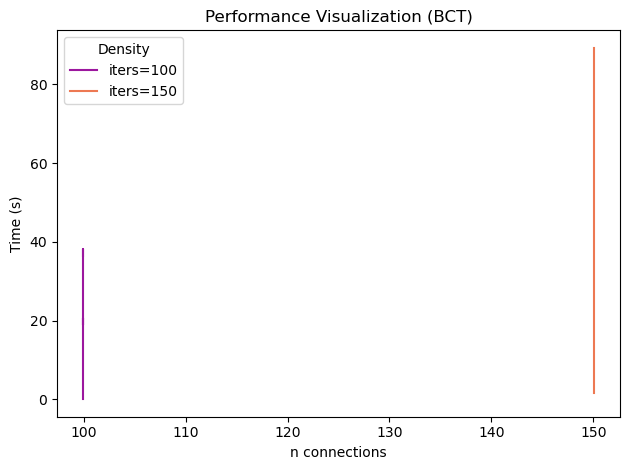

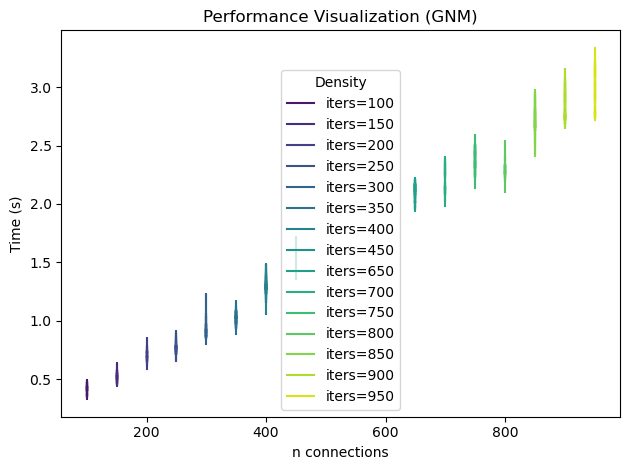

In [18]:

def visualize_performance(df, gnm_or_bct: Literal['gnm', 'bct']):
    #plt.figure(figsize=(8, 6))
    cmap_choice = {'gnm':'viridis', 
                   'bct':'plasma'}
    
    palette = sns.color_palette(cmap_choice[gnm_or_bct], len(df['num_connections'].unique()))
    
    for i, d in enumerate(sorted(df['num_connections'].unique())):
        tmp_df = df[df['num_connections'] == d] + random.uniform(-0.1, 0.1)
        
        plt.plot(tmp_df['num_connections'], 
                 tmp_df[f'time_{gnm_or_bct}'], 
                 label=f'iters={d}',
                 color=palette[i])
        
        #tmp_df[f'time_{gnm_or_bct}']
    
    plt.legend(title="Density")
    plt.xlabel("n connections")
    plt.ylabel("Time (s)")
    plt.title(f"Performance Visualization ({gnm_or_bct.upper()})")


visualize_performance(bct, 'bct')
plt.tight_layout()
plt.show()
visualize_performance(gnm, 'gnm')
plt.tight_layout()
plt.show()